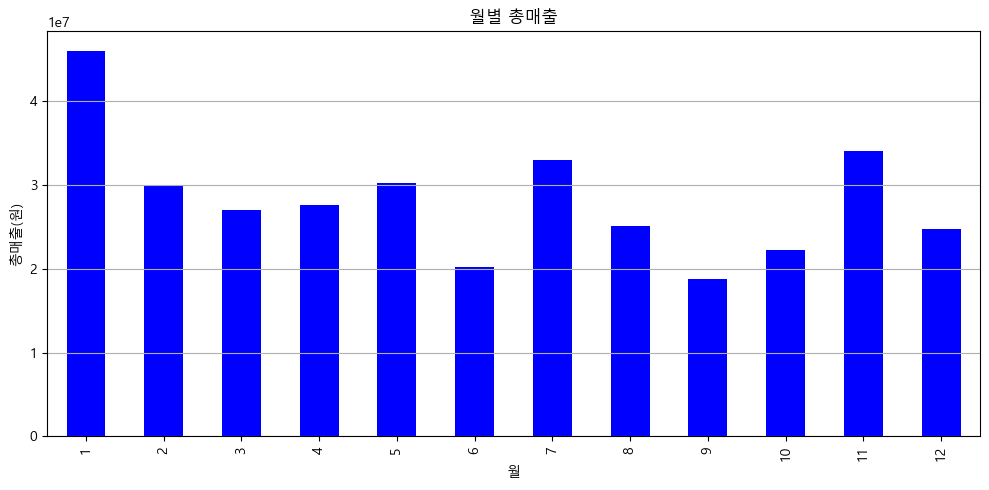

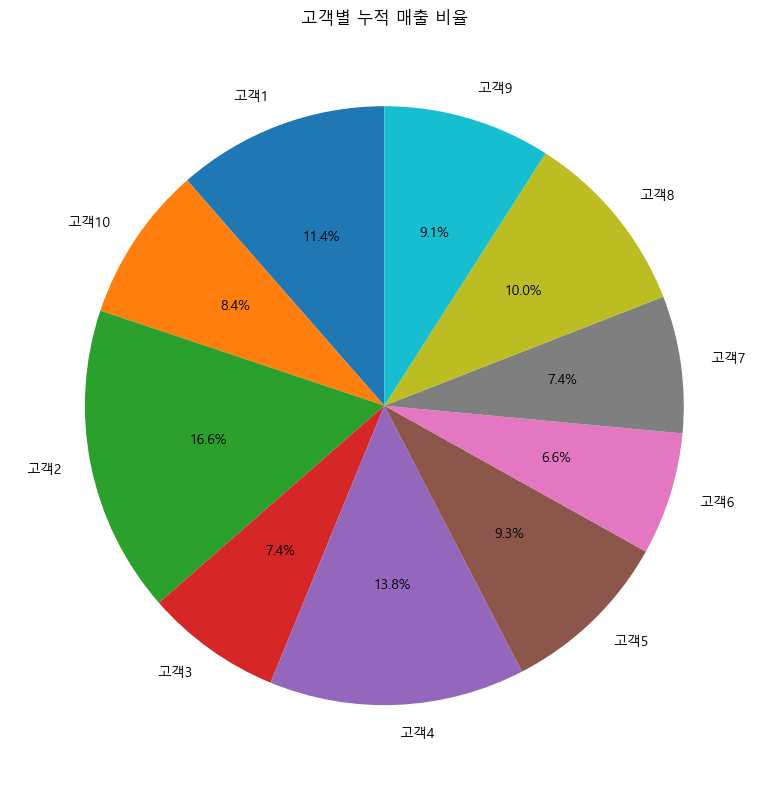

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

class CustomerSalesAnalysis:
    def __init__(self):
        # 월별 매출을 위한 날짜 생성 (2025년 1월 1일 ~ 12월 31일)
        dates = pd.date_range(start='2025-01-01', end='2025-12-31', freq='D')

        # 고객 이름 리스트 생성 (고객1 ~ 고객10)
        customers = [f'고객{i}' for i in range(1, 11)]

        # 랜덤한 구매 데이터 생성
        self.df = pd.DataFrame({
            '구매일자': np.random.choice(dates, size=200),   # 무작위 구매일자 200건
            '고객명': np.random.choice(customers, size=200),  # 고객 무작위 배정
            '상품명': np.random.choice(['CPU', '그래픽카드', '키보드', '모니터'], size=200),
            '수량': np.random.randint(1, 6, size=200),  # 구매 수량 1~5개
            '단가': np.random.randint(100000, 1000001, size=200)  # 단가 10 ~ 100 만원
        })

        # 총매출 열 추가 = 수량 × 단가
        # ex) CPU 3개 × 500,000원 = 1,500,000원
        self.df['총매출'] = self.df['수량'] * self.df['단가']

        # '구매일자' 컬럼에서 월만 추출해서 '월' 컬럼 생성
        self.df['월'] = self.df['구매일자'].dt.month

    def plot_monthly_sales(self):
        # 월 기준으로 그룹화 하고 총매출을 합산
        monthly_sales = self.df.groupby('월')['총매출'].sum()

        # 막대그래프 그리기
        plt.figure(figsize=(10, 5))
        monthly_sales.plot(kind='bar', color='blue')
        plt.title('월별 총매출')
        plt.xlabel('월')
        plt.ylabel('총매출(원)')
        plt.grid(axis='y')
        plt.tight_layout()
        plt.show()

    def plot_customer_sales_pie(self):
        # 고객별 총매출 계산
        # 고객명을 기준으로 그룹화 하고 총매출을 합산
        customer_sales = self.df.groupby('고객명')['총매출'].sum()

        # 파이 차트 그리기
        plt.figure(figsize=(8, 8))
        customer_sales.plot(kind='pie', autopct='%.1f%%', startangle=90)
        plt.title('고객별 누적 매출 비율')
        plt.ylabel('')  # y축 라벨 제거
        plt.tight_layout()
        plt.show()

# 실행
if __name__ == '__main__':
    final = CustomerSalesAnalysis()
    final.plot_monthly_sales()
    final.plot_customer_sales_pie()
